# HW3 IEOR 242

Yuehe Wen 3037343565

## Problem 0

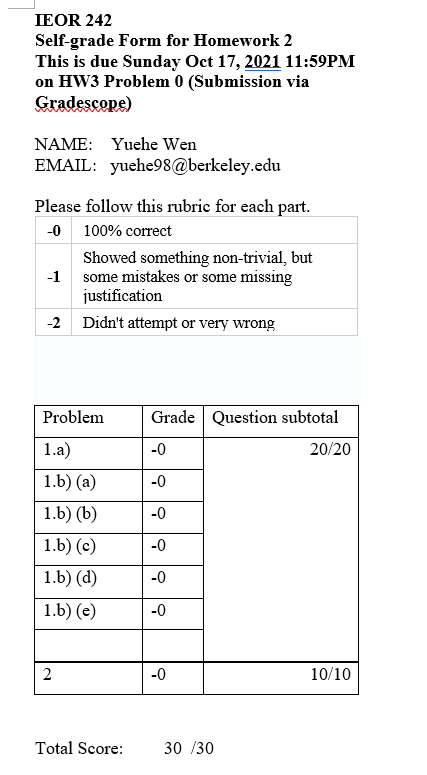

## Problem 1

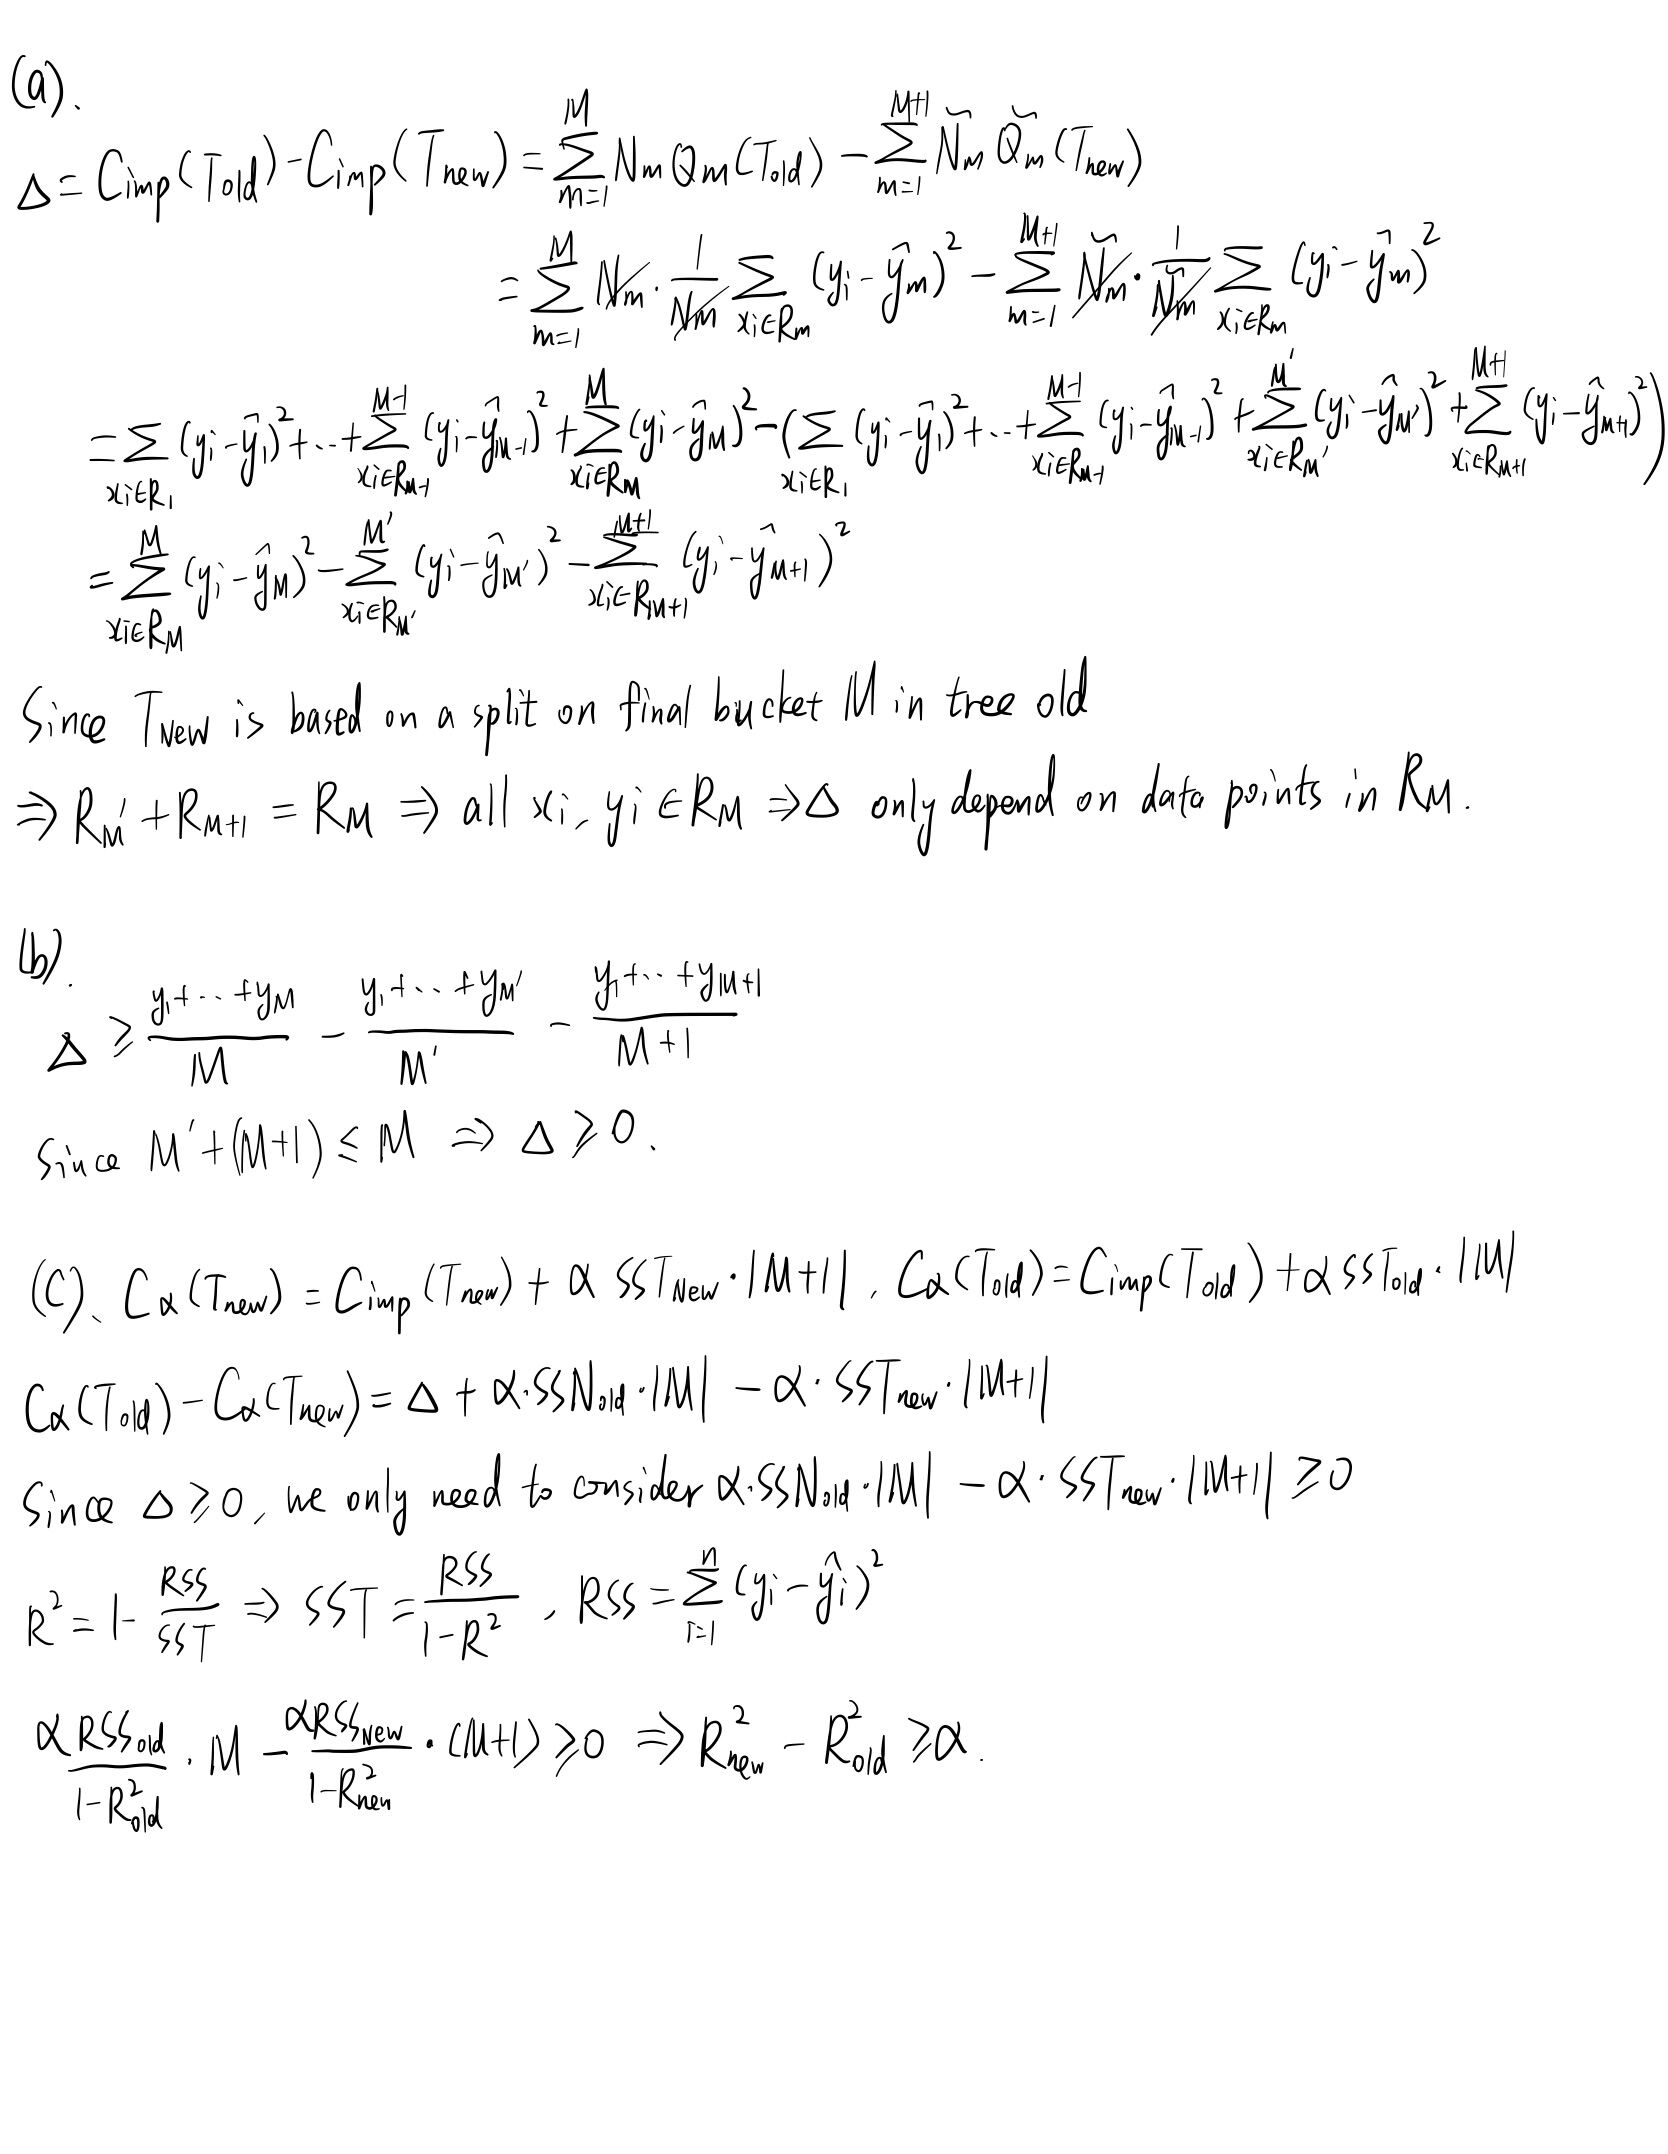

## Problem 2

### (a.)

I think this is reasonable. If we treat missing values as another category in one variable, the result can indicate whether this variable is significant in classification or not as if missing value category is selected as split, it shows that whether the variable takes value 1 or 0 does not matter for the model.

### (b.)

(i.)

Code for building a linear regression model:

In [145]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

yelp_train = pd.read_csv("yelp242_train.csv")
yelp_test = pd.read_csv("yelp242_test.csv")
yelp_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


In [146]:
yelp_train_li = yelp_train.replace(['FALSE', 'TRUE','(Missing)'],[0,1,3])
yelp_train_li = yelp_train_li.replace(["'no'", "'free'","'paid'"],[0,1,2])
yelp_train_li = yelp_train_li.replace(["'beer_and_wine'", "'full_bar'","'none'"],[1,2,0])

yelp_test_li = yelp_test.replace(['FALSE', 'TRUE','(Missing)'],[0,1,3])
yelp_test_li = yelp_test_li.replace(["'no'", "'free'","'paid'"],[0,1,2])
yelp_test_li = yelp_test_li.replace(["'beer_and_wine'", "'full_bar'","'none'"],[1,2,0])

In [147]:
li_model = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)")) + C(Alcohol, Treatment(reference="(Missing)"))+C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))+C(WiFi, Treatment(reference="(Missing)"))+C(BikeParking, Treatment(reference="(Missing)"))+C(ByAppointmentOnly, Treatment(reference="(Missing)"))+C(WheelechairAccessible, Treatment(reference="(Missing)"))+C(OutdoorSeating, Treatment(reference="(Missing)"))+C(RestaurantsReservations, Treatment(reference="(Missing)"))+C(DogsAllowed, Treatment(reference="(Missing)"))+C(Caters, Treatment(reference="(Missing)"))',
                 data=yelp_train).fit()
print(li_model.summary())                

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sat, 16 Oct 2021   Prob (F-statistic):          2.45e-235
Time:                        18:11:13   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

(ii.)

## Code for building a regression tree model:

In [148]:
from sklearn.tree import DecisionTreeRegressor

column_name = list(yelp_train.columns)[2:]
yelp_train = pd.get_dummies(yelp_train, columns = column_name, drop_first = True)
yelp_test = pd.get_dummies(yelp_test, columns = column_name, drop_first = True)
yelp_train.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'no',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,4.5,153,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,3.5,19,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,4.5,3,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,4.0,775,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,3.5,24,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## Code for cross validation to find the best ccp_alpha for the Regression Tree.

In [149]:
y_test = yelp_test['stars']
X_test = yelp_test.drop(['stars'], axis=1)
y_train = yelp_train['stars']
X_train = yelp_train.drop(['stars'], axis=1)

y_test_li = yelp_test_li['stars']
X_test_li = yelp_test_li.drop(['stars'], axis=1)
y_train_li = yelp_train_li['stars']
X_train_li = yelp_train_li.drop(['stars'], axis=1)

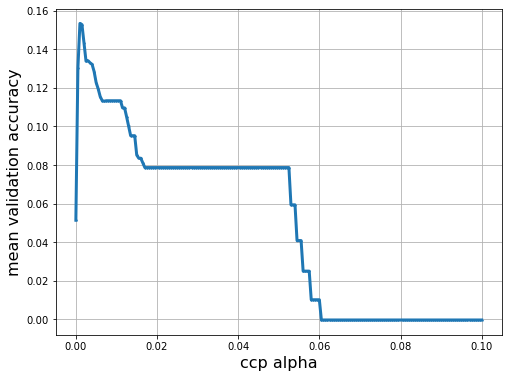

In [150]:
from sklearn.model_selection import GridSearchCV
grid_values = {'ccp_alpha': np.linspace(0, 0.1, 201)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(X_train, y_train)

acc = dtr_cv.cv_results_['mean_test_score'] 
ccp = dtr_cv.cv_results_['param_ccp_alpha'].data

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [151]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtr_cv.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtr_cv.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.001
Grid best score (accuracy):  0.15330414831152417


 In this situation, the function GridsearchCV is used to find the best fit parameters on the training set using cross validation. The result shows that the best ccp alpha for our model is 0.001.

 Then we use the parameter 0.001 to build the regression tree model:

In [152]:
dtr_model = DecisionTreeRegressor(min_samples_split=5, 
                            ccp_alpha=0.001,
                            random_state = 0)
dtr_model = dtr_model.fit(X_train, y_train)


Node count = 57


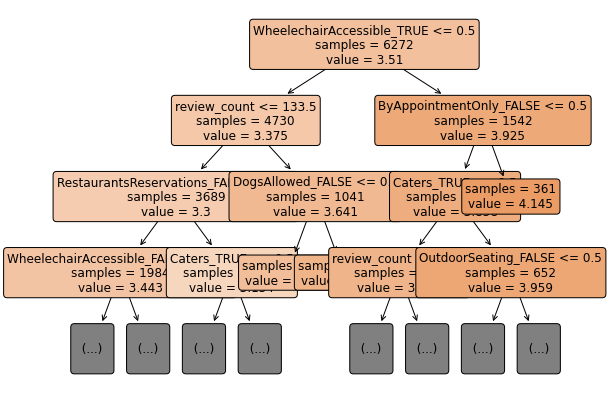

In [9]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print('Node count =', dtr_model.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr_model, 
          feature_names=X_train.columns, 
          class_names=['0','1','2','3'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

(iii.)

 The OSR^2 for the regression tree model is 0.181 and the OSR^2 for the linear regression model is 0.15268. The out of sample R squared is to test whether your predictive relationship has out-of-sample predictability. In our case, it means that for these two models, approximately 15-18% of the variation is explained by the model, which is a pretty low metrics, meaning that our models do not fit well with the data. The MAE for the regression tree model is 0.624 and the MAE for the linear regression model is 0.639. The MAE measures the absolute value of the difference between the forecasted value and the actual value, meaning that the error expected from the forecast based on our model is about 63%, which is a high error rate. Therefore, the two metrics both tell us that linear regression and regression tree may not be a good model for the dataset.

### Code:

In [10]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)
def MAE(model, X_test, y_test):
    y_pred = model.predict(X_test)
    MAE = np.sum(abs(y_pred - y_test)) / len(y_pred)
    return MAE

print('OSR2 for regression tree model:', OSR2(dtr_model, X_test, y_test, y_train))  

OSR2 for regression tree model: 0.18132484191574583


In [11]:
li_model_numerical = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference=3)) + C(Alcohol, Treatment(reference=3))+C(BusinessAcceptsCreditCards, Treatment(reference=3))+C(WiFi, Treatment(reference=3))+C(BikeParking, Treatment(reference=3))+C(ByAppointmentOnly, Treatment(reference=3))+C(WheelechairAccessible, Treatment(reference=3))+C(OutdoorSeating, Treatment(reference=3))+C(RestaurantsReservations, Treatment(reference=3))+C(DogsAllowed, Treatment(reference=3))+C(Caters, Treatment(reference=3))',
                 data=yelp_train_li).fit()
print('OSR2 for linear regression model:', OSR2(li_model_numerical, X_test_li, y_test_li, y_train_li))  

OSR2 for linear regression model: 0.15268556526341315


In [12]:
print('MAE for regression tree model:', MAE(dtr_model, X_test, y_test))  

MAE for regression tree model: 0.6242244889548366


In [14]:
print('MAE for linear regression model:', MAE(li_model_numerical, X_test_li, y_test_li)) 

MAE for linear regression model: 0.6397681634728878


## (c.)

### Coding for adding column fourOrAbove

In [153]:
stars = yelp_train['stars'].copy()
fourOrAbove = stars >= 4
fourOrAbove = fourOrAbove.astype(int)
yelp_train['stars'] = fourOrAbove
yelp_train.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'no',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,1,153,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,0,19,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,775,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,24,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [154]:
stars_test = yelp_test['stars'].copy()
fourOrAbove_test = stars_test >= 4
fourOrAbove_test = fourOrAbove_test.astype(int)
yelp_test['stars'] = fourOrAbove_test
yelp_test.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'no',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,1,34,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,1,802,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,1,231,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
3,0,27,0,1,0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,0,1
4,0,6,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [155]:
yelp_train.rename(columns={'stars':'fourOrAbove'}, inplace=True)
yelp_test.rename(columns={'stars':'fourOrAbove'}, inplace=True)

yelp_train.head()

,fourOrAbove,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'no',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,1,153,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,0,19,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,775,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,24,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [157]:
y_test_new = yelp_test['fourOrAbove']
X_test_new = yelp_test.drop(['fourOrAbove'], axis=1)
y_train_new = yelp_train['fourOrAbove']
X_train_new = yelp_train.drop(['fourOrAbove'], axis=1)


## (d.)

(i.)

We weight the loss function False Positive and False Negative equally, meaning that we get equal lose on whether we truly predict a resturant having a four above score. This is reasonable because our loss in this situation is equal, thus this model is reasonable.

(ii.)

### Code for linear regression threhold prediction:

In [19]:
linear_pred = li_model_numerical.predict(X_test_li) >= 4
linear_pred = linear_pred.astype(int)

### Code for regression tree threhold prediction:

In [20]:
retree_pred = dtr_model.predict(X_test) >= 4
retree_pred = retree_pred.astype(int)

(iii.)

### Code for building a logistic model:

In [170]:
import statsmodels.api as smf
X = X_train_new.copy()
y = y_train_new.copy()
logis_mod = smf.Logit(y,X).fit()
print(logis_mod.summary())

Optimization terminated successfully.
         Current function value: 0.604844
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6247
Method:                           MLE   Df Model:                           24
Date:                Sat, 16 Oct 2021   Pseudo R-squ.:                  0.1184
Time:                        18:14:17   Log-Likelihood:                -3793.6
converged:                       True   LL-Null:                       -4303.2
Covariance Type:            nonrobust   LLR p-value:                7.395e-200
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
review_count                         0.0005      0.000      5.01

(iv.)

First we use gridvaluecv to do the cross validation in order to find the best ccp_alpha:

In [1]:
from sklearn.tree import DecisionTreeClassifier
grid_values1 = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 
dtc_cv_acc.fit(X_train_new, y_train_new)

NameError: name 'np' is not defined

In [25]:
acc1 = dtc_cv_acc.cv_results_['mean_test_score'] 

ccp1 = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

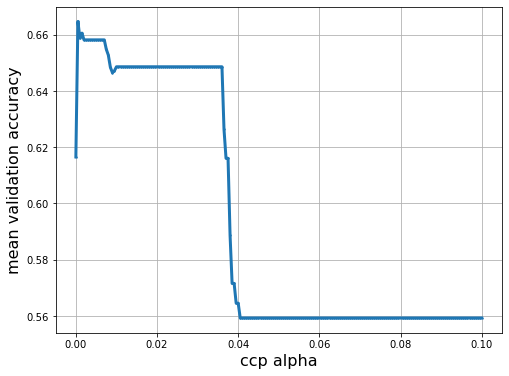

In [26]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp1, acc1, s=2)
plt.plot(ccp1, acc1, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [27]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  0.6647004744054694


From the result, we can see that the ccp that achieves the highest accuracy is 0.0005, so we use this parameter to build the classification tree model. 

Node count = 109


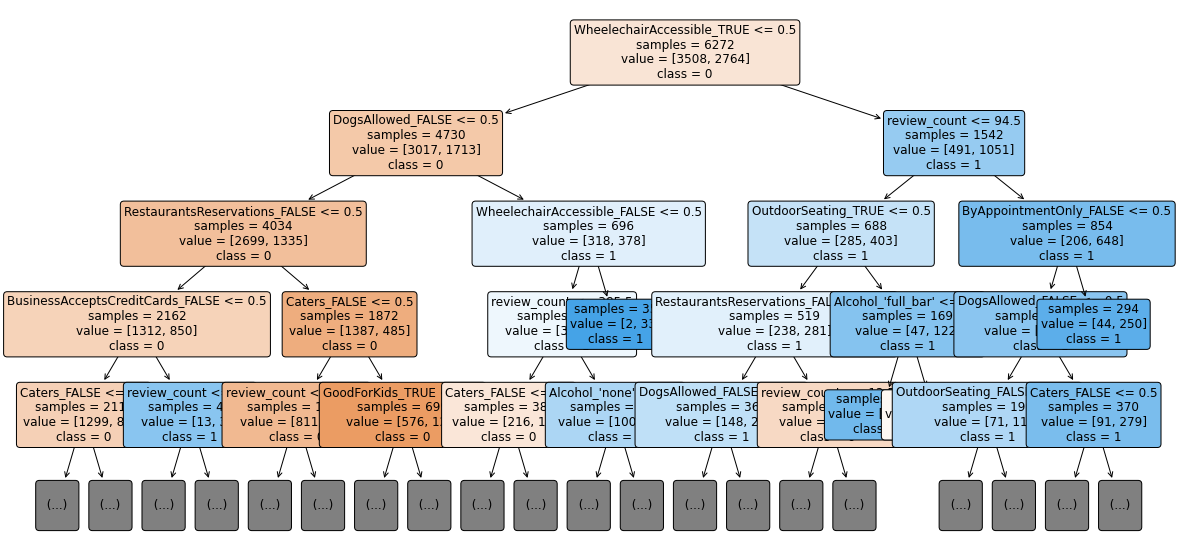

In [28]:
dtc_model = DecisionTreeClassifier(min_samples_split=5, 
                            ccp_alpha=0.0005,
                            random_state = 88)
dtc_model = dtc_model.fit(X_train_new, y_train_new)

print('Node count =', dtc_model.tree_.node_count)
plt.figure(figsize=(20,10))
plot_tree(dtc_model, 
          feature_names=X_train_new.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=4)
plt.show()

(v.)

The table containing all the metrics for all the models is: 

In [79]:
df_table

,TPR,FPR,Accuracy
Baseline Model,0.000000,0.000000,0.557292
Linear model,0.175630,0.041389,0.611979
Regression Tree,0.194958,0.044726,0.618676
Logistic,0.476471,0.182243,0.666667
Classification Tree,0.400000,0.146862,0.652530


It can be seen that the two classification models have higher accuracy than the two regression models as well as the baseline model. Therefore, it shows that classification is of better fit to the target dataset. Since the dataset contains lots of categorical variables and we want to measure whether a restaurant has a score 4 or not, it is reasonable that regression is not suitable in this problem as it mainly deals with continuous cases. And in the two classification models, since we have equal weight on false negative and false positive, we only cares about accuracy, so the logistic model has a best performance. 

In [68]:
from sklearn.metrics import confusion_matrix
def TPR_FPR_ACC(y_pred,y_test):
    cm = confusion_matrix(y_test, y_pred)
    TPR = cm[1][1] / sum(cm[1])
    FPR = cm[0][1] / sum(cm[0])
    ACC = (cm[1][1] + cm[0][0]) / (sum(cm)[0]+sum(cm)[1])
    return [TPR, FPR, ACC]

In [69]:
# Baseline model:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
baseline_model = dummy_clf.fit(X_train_new, y_train_new)
y_pred_baseline = baseline_model.predict(X_test_new)
TPR_FPR_ACC(y_pred_baseline,y_test_new)

[0.0, 0.0, 0.5572916666666666]

In [86]:
# Linear regression model with threhold:
TPR_FPR_ACC(linear_pred,y_test_new)
# TPR = 0.1756, FPR = 0.0414, accuracy = 0.6119

[0.17563025210084032, 0.04138851802403204, 0.6119791666666666]

In [83]:
# Regression tree model with threhold:
TPR_FPR_ACC(retree_pred,y_test_new)

[0.1949579831932773, 0.04472630173564753, 0.6186755952380952]

In [114]:
# Logistic regression model:
y_prob_logistic = logis_mod.predict(X_test_new)
y_pred_logistic = pd.Series([1 if x > 0.5 else 0 for x in y_prob_logistic], index=y_prob_logistic.index)
TPR_FPR_ACC(y_pred_logistic,y_test_lo)


[0.4815126050420168, 0.1822429906542056, 0.6688988095238095]

In [74]:
# Classification tree model:
y_pred_class = dtc_model.predict(X_test_new)
TPR_FPR_ACC(y_pred_class,y_test_new)

[0.4, 0.14686248331108145, 0.6525297619047619]

In [115]:
data_table = [TPR_FPR_ACC(y_pred_baseline,y_test_new), TPR_FPR_ACC(linear_pred,y_test_lo), TPR_FPR_ACC(retree_pred,y_test_lo),TPR_FPR_ACC(y_pred_logistic,y_test_lo),TPR_FPR_ACC(y_pred_class,y_test_new)]
df_table = pd.DataFrame(data_table, columns = ['TPR', 'FPR','Accuracy'], index = ['Baseline Model', 'Linear model','Regression Tree', 'Logistic','Classification Tree'] )
df_table

,TPR,FPR,Accuracy
Baseline Model,0.000000,0.000000,0.557292
Linear model,0.175630,0.041389,0.611979
Regression Tree,0.194958,0.044726,0.618676
Logistic,0.481513,0.182243,0.668899
Classification Tree,0.400000,0.146862,0.652530


### (e.)

Tip 1:

    Having larger number of review counts do contribute to the rating of restuarants. It can be seen from the plot that restuarants that have more reviews tend to be more likely to have a rating higher than 4. 

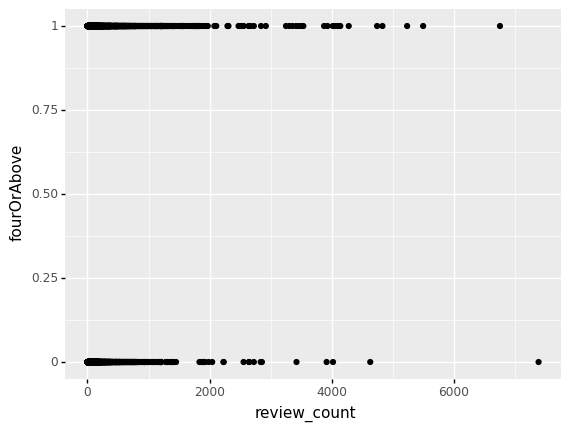

<ggplot: (99604110472)>

In [187]:
from plotnine import ggplot, geom_point, aes, geom_bar, theme
(ggplot(yelp_train, aes(x='review_count', y='fourOrAbove')) +
      geom_point()
)        

Tip 2:

    Making the restuarant available to the customers without requiring appointments will make your restuarant more popular, resulting in a higher rating. From the logistic model we used to predict the ratings, we found out that not by appointment only is a significant contributor to high rating.

Tip 3:

    Paid WiFi is a deduction on restuarants' ratings. From the significance of variables in our model we found out that do not having a WiFi does not lead to lower rating from customers, but interestingly a paid WiFi does. Therefore, better not having it than make it paid.